# Data Science Project 1
created by: Ari Sulistiyo Prabowo

>**Objective:** to utilize the skill of coding, especially in using pandas library to manipulate and transform the data

Challenges:
1.   Merging the data into one dataframe 
  - First, merge orders_data and order_item_data
  - Finally, merge the first step with product_data and customer_data
2. Customize the type of the columns that should be
  - datetime, int, float, object
3. Check any null values from the merged dataframe
  - Clue, using append
4.   In the merged dataframe, please add new column to get the date and the time(hour) and day name from:
  - order_purchase_timestamp
  - order_delivered_customer_date
5. How many unique customer do the transaction in each City?
  - Clue, use pivot table or group by
6. Get the top 5 cities that has the highest number of unique customer.
  - Clue, sorting the data using sort_values
7. At that 5 cities, what time the customers do the transaction? show them in:
  - Average
  - Median
  - Clue, use pivot table or group by
8. From the top 5 cities, show the # of customers in each purchase weekdays
  - Sorting the columns from monday to sunday
9. Make a gradient towards the data in each cities
10. Filter the city that has name of sao paulo

Reference:
- [Get the month, year, date](https://www.geeksforgeeks.org/processing-time-with-pandas-dataframe/)
- [String contains](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.contains.html)
- [Groupby](https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.core.groupby.DataFrameGroupBy.agg.html)
- [Rename Column](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html)


## Preparation

In [ ]:
#import library
import pandas as pd
import numpy as np

In [ ]:
customer_data = pd.read_csv("/content/drive/MyDrive/Data Ari Gmail/Data_Ari/Data_Science/Digital Skola/Indonesia Version/Data Science Project 1/customers_dataset.csv")
order_items_data = pd.read_csv("/content/drive/MyDrive/Data Ari Gmail/Data_Ari/Data_Science/Digital Skola/Indonesia Version/Data Science Project 1/order_items_dataset.csv")
orders_data = pd.read_csv("/content/drive/MyDrive/Data Ari Gmail/Data_Ari/Data_Science/Digital Skola/Indonesia Version/Data Science Project 1/orders_dataset.csv")
product_data = pd.read_csv("/content/drive/MyDrive/Data Ari Gmail/Data_Ari/Data_Science/Digital Skola/Indonesia Version/Data Science Project 1/products_dataset.csv")

In [ ]:
#customer data
print("Dimension from customer_data", customer_data.shape)
customer_data.head()

Dimension from customer_data (99441, 5)


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
#order_items data
print("Dimension from order_items_data", order_items_data.shape)
order_items_data.head()

Dimension from order_items_data (112650, 7)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
#order data
print("Dimension from orders_data", orders_data.shape)
orders_data.head()

Dimension from orders_data (99441, 8)


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
#product data
print("Dimension from product_data", product_data.shape)
product_data.head()

Dimension from product_data (32951, 9)


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Here is the schema of the data

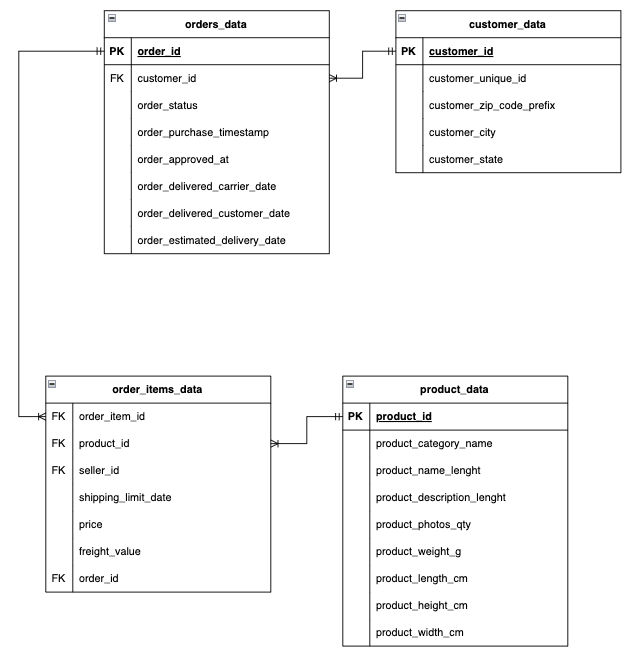

##Challenge 1
Merging the data into one dataframe 

In [ ]:
#merging order_data and order_item_data
merge_1 = order_items_data.merge(orders_data, how='inner', on='order_id')
print("Dimension of merge_1", merge_1.shape)
merge_1.head()

Dimension of merge_1 (112650, 14)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15 00:00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05 00:00:00
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20 00:00:00
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17 00:00:00


In [ ]:
#merging merge_1 and product_data
merge_2 = merge_1.merge(product_data, how='left', on='product_id')
print("Dimenseion of merge_2", merge_2.shape)
merge_2.head()

Dimenseion of merge_2 (112650, 22)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,2017-09-20 23:43:48,2017-09-29 00:00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,2017-05-12 16:04:24,2017-05-15 00:00:00,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,2018-01-22 13:19:16,2018-02-05 00:00:00,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,2018-08-14 13:32:39,2018-08-20 00:00:00,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,2017-03-01 16:42:31,2017-03-17 00:00:00,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0


In [ ]:
#merging merge_1 and product_data
merge_3 = merge_2.merge(customer_data, how='left', on='customer_id')
print("Dimenseion of merge_3", merge_3.shape)
merge_3.head()

Dimenseion of merge_3 (112650, 26)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,598.0,4.0,650.0,28.0,9.0,14.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,239.0,2.0,30000.0,50.0,30.0,40.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,695.0,2.0,3050.0,33.0,13.0,33.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,480.0,1.0,200.0,16.0,10.0,15.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,409.0,1.0,3750.0,35.0,40.0,30.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [ ]:
# from google.colab import files

# merge_3.to_csv('merging_data.csv')
# files.download('merging_data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Challenge 2
Customize the type of the columns that should be
datetime, int, float, object

In [ ]:
# change object to datetime
datetime = ['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date']

for i in datetime:
  merge_3[i] = pd.to_datetime(merge_3[i])

##Challenge 3
Check any null values from the merged dataframe

In [ ]:
#check any null values
type_null = pd.DataFrame(merge_3.dtypes).T.rename(index = {0: 'Columns Type'})
type_null = type_null.append(pd.DataFrame(merge_3.isnull().sum()).T.rename(index = {0: 'Amount of Null Values'}))
type_null = type_null.append(pd.DataFrame(merge_3.isnull().sum()/merge_3.shape[0]*100).T.rename(index = {0: 'Percentage of Null Values'}))
display(type_null)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
Columns Type,object,int64,object,object,object,float64,float64,object,object,datetime64[ns],...,float64,float64,float64,float64,float64,float64,object,int64,object,object
Amount of Null Values,0,0,0,0,0,0,0,0,0,0,...,1603,1603,18,18,18,18,0,0,0,0
Percentage of Null Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.422992,1.422992,0.015979,0.015979,0.015979,0.015979,0.0,0.0,0.0,0.0


##Challenge 4
In the merged dataframe, please add new column to get the date and the time (hour) from:
- order_purchase_timestamp
- order_delivered_customer_date

In [ ]:
merge_3.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,...,598.0,4.0,650.0,28.0,9.0,14.0,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,...,239.0,2.0,30000.0,50.0,30.0,40.0,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,...,695.0,2.0,3050.0,33.0,13.0,33.0,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,...,480.0,1.0,200.0,16.0,10.0,15.0,af861d436cfc08b2c2ddefd0ba074622,12952,atibaia,SP
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,...,409.0,1.0,3750.0,35.0,40.0,30.0,64b576fb70d441e8f1b2d7d446e483c5,13226,varzea paulista,SP


In [ ]:
# for order_purchase_date
merge_3['order_purchase_date'] = merge_3['order_purchase_timestamp'].dt.date
merge_3['order_purchase_hour'] = merge_3['order_purchase_timestamp'].dt.hour
merge_3['order_purchase_weekday'] = merge_3['order_purchase_timestamp'].dt.day_name()

# for order_delivered_customer_date
merge_3['order_delivered_customer_date_only'] = merge_3['order_delivered_customer_date'].dt.date
merge_3['order_delivered_customer_hour'] = merge_3['order_delivered_customer_date'].dt.hour
merge_3['order_delivered_customer_weekday'] = merge_3['order_delivered_customer_date'].dt.day_name()

In [ ]:
merge_3[['order_purchase_date','order_purchase_hour','order_purchase_weekday',
         'order_delivered_customer_date_only','order_delivered_customer_hour','order_delivered_customer_weekday']]

,order_purchase_date,order_purchase_hour,order_purchase_weekday,order_delivered_customer_date_only,order_delivered_customer_hour,order_delivered_customer_weekday
0,2017-09-13,8,Wednesday,2017-09-20,23.0,Wednesday
1,2017-04-26,10,Wednesday,2017-05-12,16.0,Friday
2,2018-01-14,14,Sunday,2018-01-22,13.0,Monday
3,2018-08-08,10,Wednesday,2018-08-14,13.0,Tuesday
4,2017-02-04,13,Saturday,2017-03-01,16.0,Wednesday
...,...,...,...,...,...,...
112645,2018-04-23,13,Monday,2018-05-10,22.0,Thursday
112646,2018-07-14,10,Saturday,2018-07-23,20.0,Monday
112647,2017-10-23,17,Monday,2017-10-28,12.0,Saturday
112648,2017-08-14,23,Monday,2017-08-16,21.0,Wednesday


## Challenge 5
How many unique customer do the transaction in each City?
- Clue, use pivot table or group by

In [ ]:
customer_city = pd.pivot_table(merge_3, values='customer_id', index=['customer_city'], aggfunc=pd.Series.nunique)
customer_city

,customer_id
customer_city,
abadia dos dourados,3
abadiania,1
abaete,12
abaetetuba,11
abaiara,2
...,...
xinguara,9
xique-xique,3
zacarias,2


## Challenge 6
Get the top 5 cities that has the highest number of unique customer.

In [ ]:
customer_city = customer_city.reset_index()
customer_city.sort_values(by='customer_id', ascending=False)[:5]

,customer_city,customer_id
3588,sao paulo,15402
3147,rio de janeiro,6834
452,belo horizonte,2750
557,brasilia,2116
1141,curitiba,1510


## Challenge 7
At that 5 cities, what time the customers do the transaction? show them in:
  - Average
  - Median
  - Clue, use pivot table or group by

In [ ]:
data_top_5_cities = merge_3[(merge_3['customer_city'] == 'sao paulo') | (merge_3['customer_city'] == 'rio de janeiro') |
                                      (merge_3['customer_city'] == 'belo horizonte') | (merge_3['customer_city'] == 'brasilia') |
                                      (merge_3['customer_city'] == 'curitiba')]

data_top_5_cities.head()                                    

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,...,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_purchase_date,order_purchase_hour,order_purchase_weekday,order_delivered_customer_date_only,order_delivered_customer_hour,order_delivered_customer_weekday
12,0006ec9db01a64e59a68b2c340bf65a7,1,99a4788cb24856965c36a24e339b6058,4a3ca9315b744ce9f8e9374361493884,2018-07-26 17:24:20,74.0,23.32,5d178120c29c61748ea95bac23cb8f25,delivered,2018-07-24 17:04:17,...,7ed0ea20347f67fe61d1c99fdf8556ae,21810,rio de janeiro,RJ,2018-07-24,17,Tuesday,2018-07-31,1.0,Tuesday
20,000e63d38ae8c00bbcb5a30573b99628,1,553e0e7590d3116a072507a3635d2877,1c129092bf23f28a5930387c980c0dfc,2018-03-29 20:07:49,47.9,8.88,98884e672c5ba85f4394f2044e1a3eab,delivered,2018-03-23 19:48:26,...,860fc00d3154ce2346c43ebe47b9b6ce,4679,sao paulo,SP,2018-03-23,19,Friday,2018-03-27,14.0,Tuesday
24,0010b2e5201cc5f1ae7e9c6cc8f5bd00,1,5a419dbf24a8c9718fe522b81c69f61a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-09-15 18:04:37,48.9,16.60,57ef317d4818cb42680fc9dfd13867ce,delivered,2017-09-11 17:39:33,...,e883f26917e2095c439f70c2cf8c914b,22461,rio de janeiro,RJ,2017-09-11,17,Monday,2017-09-23,13.0,Saturday
26,0011d82c4b53e22e84023405fb467e57,1,c389f712c4b4510bc997cee93e8b1a28,bfd27a966d91cfaafdb25d076585f0da,2018-01-29 21:51:25,289.0,26.33,2013d892495e1a101d742d533d2d1119,delivered,2018-01-16 21:43:23,...,02daaa0e021d624d1784c4ea5cc84ace,1033,sao paulo,SP,2018-01-16,21,Tuesday,2018-01-26,22.0,Friday
30,00137e170939bba5a3134e2386413108,1,672e757f331900b9deea127a2a7b79fd,e59aa562b9f8076dd550fcddf0e73491,2017-11-30 06:30:55,397.0,24.65,7b63cba66b8e6d002e94d0990c1e2868,delivered,2017-11-24 16:50:38,...,38c3bc2d6df03905e3e8d3d5b079acf4,22790,rio de janeiro,RJ,2017-11-24,16,Friday,2017-12-11,19.0,Monday


In [ ]:
data_top_5_cities.groupby('customer_city').agg(average_hour = ('order_purchase_hour','mean'),
                                               median_hour = ('order_purchase_hour', 'median'))

,average_hour,median_hour
customer_city,,
belo horizonte,14.864504,15.0
brasilia,14.930184,15.0
curitiba,15.064535,15.0
rio de janeiro,14.624218,15.0
sao paulo,14.613544,15.0


In [ ]:
data_top_5_cities.groupby('customer_city').agg({'order_purchase_hour':['mean','median']})

order_purchase_hour       
                              mean median
customer_city                            
belo horizonte           14.864504   15.0
brasilia                 14.930184   15.0
curitiba                 15.064535   15.0
rio de janeiro           14.624218   15.0
sao paulo                14.613544   15.0

## Challenge 8

In [ ]:
challenge_8 = pd.pivot_table(data_top_5_cities, values='customer_id', index=['customer_city'], columns=['order_purchase_weekday'], aggfunc = pd.Series.nunique)
challenge_8 = challenge_8.reset_index()
challenge_8 = challenge_8.rename_axis(None, axis=1).reset_index(drop=True)
challenge_8

,customer_city,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,belo horizonte,404,441,262,358,412,453,420
1,brasilia,347,352,230,238,312,314,323
2,curitiba,205,252,169,180,242,239,223
3,rio de janeiro,1028,1059,765,825,1020,1061,1076
4,sao paulo,2124,2496,1593,1886,2344,2559,2400


In [ ]:
# manual effort
challenge_8[['customer_city','Sunday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]

,customer_city,Sunday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,belo horizonte,358,453,420,412,404,262,358
1,brasilia,238,314,323,312,347,230,238
2,curitiba,180,239,223,242,205,169,180
3,rio de janeiro,825,1061,1076,1020,1028,765,825
4,sao paulo,1886,2559,2400,2344,2124,1593,1886


In [ ]:
# with sort_index()
rename_challenge_8 = challenge_8.rename(columns={'customer_city':0, 'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7})
rename_challenge_8 = rename_challenge_8.sort_index(axis=1)
rename_challenge_8 = rename_challenge_8.rename(columns={0:'customer_city', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'})
rename_challenge_8

,customer_city,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,belo horizonte,508,511,486,471,472,287,409
1,brasilia,384,370,350,347,404,274,263
2,curitiba,283,284,252,289,238,190,215
3,rio de janeiro,1229,1251,1233,1175,1185,854,910
4,sao paulo,2894,2971,2763,2744,2450,1806,2180


## Challenge 9
Make a gradient towards the data in each cities

In [ ]:
rename_challenge_8.style.background_gradient(cmap='Greens', axis=1)

,customer_city,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
0,belo horizonte,508,511,486,471,472,287,409
1,brasilia,384,370,350,347,404,274,263
2,curitiba,283,284,252,289,238,190,215
3,rio de janeiro,1229,1251,1233,1175,1185,854,910
4,sao paulo,2894,2971,2763,2744,2450,1806,2180


## Challenge 10
Filter the city that has name of sao paulo. How many customers that the customer_city contains name of sao paulo

In [ ]:
challenge_10 = merge_3[merge_3['customer_city'].str.contains('sao paulo', case=False)]

pd.pivot_table(challenge_10, values='customer_id', index=['customer_city'], aggfunc = pd.Series.nunique)

,customer_id
customer_city,
morro de sao paulo,1
sao paulo,15402
sao paulo das missoes,2
sao paulo do potengi,2
